In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

---------------------

In [3]:
recup = pd.read_csv('./curados/para_reg.csv')

In [4]:
recup.shape

(756, 20)

In [5]:
# dropeo todo o que tiene null (solo me quedo con lo robado y recuperado en este período.)
recup = recup.dropna()

In [6]:
recup.shape

(756, 20)

In [7]:
recup.columns

Index(['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_descripcion', 'registro_seccional_provincia',
       'automotor_origen', 'automotor_anio_modelo',
       'automotor_tipo_descripcion', 'automotor_marca_descripcion',
       'automotor_modelo_descripcion', 'automotor_uso_descripcion',
       'titular_tipo_persona', 'titular_domicilio_localidad',
       'titular_domicilio_provincia', 'titular_genero',
       'titular_anio_nacimiento', 'titular_pais_nacimiento', 'unico_duenio',
       'fecha_recup', 'dias'],
      dtype='object')

In [8]:
def daysonly(dias):
    return int(dias.split(' ')[0])

In [9]:
# genero una nueva columna donde el dato es solo la cantidad de dias como int
recup['dias_'] = recup['dias'].apply(daysonly)

In [11]:
recup.head(2)

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_descripcion,automotor_marca_descripcion,automotor_modelo_descripcion,...,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,unico_duenio,fecha_recup,dias,dias_
0,DENUNCIA DE ROBO O HURTO,2018-01-11,1988-09-06,ESTEBAN ECHEVERRIA Nº 1,Buenos Aires,Nacional,1988.0,FURGON,FORD,F-100,...,Física,LUIS GUILLON,BUENOS AIRES,Masculino,1988.0,ARGENTINA,1.0,2019-01-29,383 days 00:00:00.000000000,383
1,DENUNCIA DE ROBO O HURTO,2018-01-31,2017-03-31,LANUS Nº 1,Buenos Aires,Nacional,2017.0,SEDAN 4 P,FIAT,PALIO,...,Física,LANUS,BUENOS AIRES,Masculino,1986.0,ARGENTINA,1.0,2018-09-25,237 days 00:00:00.000000000,237


(0, 600)

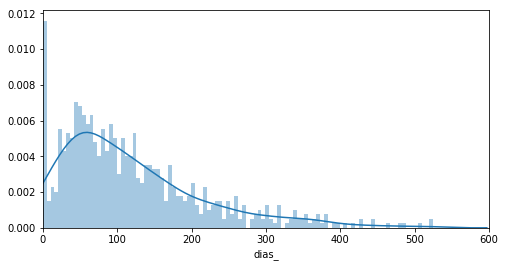

In [12]:
plt.figure(figsize= (8,4))
sns.distplot(recup.dias_, bins= 100)
plt.xlim(0,600)

In [13]:
recup.dias_.describe()

count    756.000000
mean     120.099206
std       97.520503
min        0.000000
25%       49.000000
50%       96.500000
75%      164.000000
max      525.000000
Name: dias_, dtype: float64

-------------------------------------------

# Voy a hacer una regresión para ver si puedo predecir días hasta recupero

## limpio features y feature engineering

In [13]:
recup.columns

Index(['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_descripcion', 'registro_seccional_provincia',
       'automotor_origen', 'automotor_anio_modelo',
       'automotor_tipo_descripcion', 'automotor_marca_descripcion',
       'automotor_modelo_descripcion', 'automotor_uso_descripcion',
       'titular_tipo_persona', 'titular_domicilio_localidad',
       'titular_domicilio_provincia', 'titular_genero',
       'titular_anio_nacimiento', 'titular_pais_nacimiento', 'unico_duenio',
       'fecha_recup', 'dias', 'dias_'],
      dtype='object')

In [14]:
recup.drop(['tramite_tipo', 'registro_seccional_descripcion', 'titular_domicilio_localidad',
            'dias', 'fecha_recup'], axis= 1, inplace = True)

In [16]:
recup.columns

Index(['tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_provincia', 'automotor_origen',
       'automotor_anio_modelo', 'automotor_tipo_descripcion',
       'automotor_marca_descripcion', 'automotor_modelo_descripcion',
       'automotor_uso_descripcion', 'titular_tipo_persona',
       'titular_domicilio_provincia', 'titular_genero',
       'titular_anio_nacimiento', 'titular_pais_nacimiento', 'unico_duenio',
       'dias_'],
      dtype='object')

In [17]:
# sacar de fecha de tramite (denuncia robo), mes y día de la semana, dia del año. 
# sacar de fecha_inscripción_inicial (patentamiento), año
# tirar titulpar_domicilio_provincia pero hacer columna que sea si está radicado en prov de domicilio

In [20]:
recup['tramite_fecha'] = pd.to_datetime(recup['tramite_fecha'])
recup['fecha_inscripcion_inicial'] = pd.to_datetime(recup['fecha_inscripcion_inicial'])


In [21]:
recup['dia_robo'] = recup['tramite_fecha'].apply(lambda x: int(x.isoweekday())) #lunes es 1, domingo 7
recup['mes_robo'] = recup['tramite_fecha'].apply(lambda x: int(x.month))
recup['dia_del_anio'] = recup['tramite_fecha'].apply(lambda x: int(x.timetuple().tm_yday))
recup['anio_pat'] = recup['fecha_inscripcion_inicial'].apply(lambda x: int(x.year))

In [22]:
recup['registro_seccional_provincia'] = recup['registro_seccional_provincia'].apply(lambda x: x.upper()) 

In [23]:
#recup['tit_radicado'] = 
recup['tit_radicado'] = (recup['registro_seccional_provincia'] == recup['titular_domicilio_provincia']).astype(int)
recup['automotor_anio_modelo'] = recup['automotor_anio_modelo'].astype(int)
recup['titular_anio_nacimiento'] = recup['titular_anio_nacimiento'].astype(int)


In [24]:
recup.drop(['tramite_fecha', 'fecha_inscripcion_inicial', 'titular_domicilio_provincia'], axis = 1, inplace= True)

In [25]:
recup.head(2)

,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_descripcion,automotor_marca_descripcion,automotor_modelo_descripcion,automotor_uso_descripcion,titular_tipo_persona,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,unico_duenio,dias_,dia_robo,mes_robo,dia_del_anio,anio_pat,tit_radicado
0,BUENOS AIRES,Nacional,1988,FURGON,FORD,F-100,Privado,Física,Masculino,1988,ARGENTINA,1.0,383,4,1,11,1988,1
1,BUENOS AIRES,Nacional,2017,SEDAN 4 P,FIAT,PALIO,Privado,Física,Masculino,1986,ARGENTINA,1.0,237,3,1,31,2017,1


### separo variable a predecir de X

In [66]:
#y = recup.dias_

In [72]:
#X = recup[['tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_provincia', 'automotor_origen',
       'automotor_anio_modelo', 'automotor_tipo_descripcion',
       'automotor_uso_descripcion', 'titular_tipo_persona',
       'titular_domicilio_provincia', 'titular_genero',
       'titular_anio_nacimiento', 'titular_pais_nacimiento', 'unico_duenio',
       'fecha_recup']]

In [26]:
recup.columns

Index(['registro_seccional_provincia', 'automotor_origen',
       'automotor_anio_modelo', 'automotor_tipo_descripcion',
       'automotor_marca_descripcion', 'automotor_modelo_descripcion',
       'automotor_uso_descripcion', 'titular_tipo_persona', 'titular_genero',
       'titular_anio_nacimiento', 'titular_pais_nacimiento', 'unico_duenio',
       'dias_', 'dia_robo', 'mes_robo', 'dia_del_anio', 'anio_pat',
       'tit_radicado'],
      dtype='object')

In [27]:
prov_dummie= pd.get_dummies(recup.registro_seccional_provincia)
origen_dummie= pd.get_dummies(recup.automotor_origen)
tipo_dummie= pd.get_dummies(recup.automotor_tipo_descripcion)
marca_dummie= pd.get_dummies(recup.automotor_marca_descripcion)
modelo_dummie= pd.get_dummies(recup.automotor_modelo_descripcion)
uso_dummie= pd.get_dummies(recup.automotor_uso_descripcion)
pais_tit_dummie = pd.get_dummies(recup.titular_pais_nacimiento)
# MARCA NO LA NECESITAMOS, CON MODELO YA TENÉS MARCA

In [28]:
recup['titular_pers_fisica'] = np.where(recup['titular_tipo_persona'] == 'Física', 1, 0)

In [29]:
recup['titular_masculino'] = np.where(recup['titular_genero'] == 'Masculino', 1, 0)

In [30]:
recup = recup.join([prov_dummie, origen_dummie, tipo_dummie,  modelo_dummie, uso_dummie, pais_tit_dummie, marca_dummie]) #marca_dummie,

In [31]:
recup.drop(['registro_seccional_provincia', 'automotor_origen', 'automotor_uso_descripcion','automotor_tipo_descripcion',
        'automotor_marca_descripcion', 'automotor_modelo_descripcion','titular_pais_nacimiento', 
       'titular_tipo_persona', 'titular_genero'], axis= 1, inplace = True)

In [36]:
recup.dtypes

automotor_anio_modelo        int32
titular_anio_nacimiento      int32
unico_duenio               float64
dias_                        int64
dia_robo                     int64
                            ...   
PEUGEOT                      uint8
RENAULT                      uint8
SUZUKI                       uint8
TOYOTA                       uint8
VOLKSWAGEN                   uint8
Length: 152, dtype: object

In [37]:
y = recup.dias_

In [38]:
#X = recup.drop('dias_', axis= 1)
# saco todo lo que viene de fecha salvo dia de la semana
X = recup.drop('dias_', axis = 1)

In [44]:
recup['titular_pers_fisica'].value_counts()

1    756
Name: titular_pers_fisica, dtype: int64

In [41]:
#recup.corr()
#plt.matshow(recup.corrwith(y))
recup['titular_pers_fisica'].corr(y) # NO TIENE CORRELACION, SON TODAS PERSONAS FISICAS, VUELA

nan

In [52]:
#ver como correlacionan las variables numéricas con y(dias_)
recup[['automotor_anio_modelo','unico_duenio', 'dias_', 'dia_robo', 'mes_robo', 'dia_del_anio',
       'titular_masculino', 'titular_anio_nacimiento', 'anio_pat', 'tit_radicado']].corrwith(recup['dias_'])

automotor_anio_modelo     -0.022931
unico_duenio               0.033787
dias_                      1.000000
dia_robo                   0.027481
mes_robo                  -0.016532
dia_del_anio              -0.019052
titular_masculino          0.055440
titular_anio_nacimiento    0.034559
anio_pat                  -0.022560
tit_radicado               0.063273
dtype: float64

In [46]:
X.drop(['titular_pers_fisica'], axis=1, inplace= True)

In [47]:
X.shape

(756, 150)

In [53]:
X.columns

Index(['automotor_anio_modelo', 'titular_anio_nacimiento', 'unico_duenio',
       'dia_robo', 'mes_robo', 'dia_del_anio', 'anio_pat', 'tit_radicado',
       'titular_masculino', 'BUENOS AIRES',
       ...
       'HONDA', 'IVECO', 'JEEP', 'MERCEDES BENZ', 'NISSAN', 'PEUGEOT',
       'RENAULT', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN'],
      dtype='object', length=150)

(-0.4, 0.4)

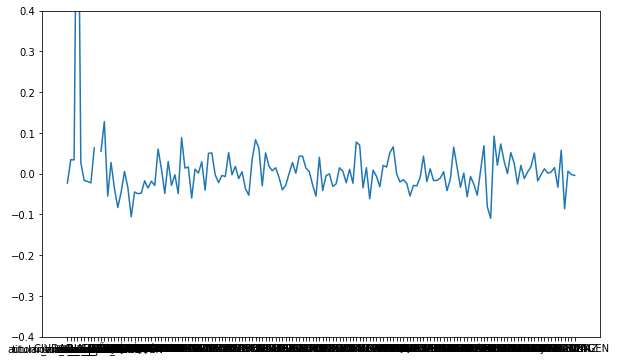

In [203]:
plt.figure(figsize= (10,6))
plt.plot(recup.corrwith(recup.dias_))
plt.ylim(-0.4, 0.4)

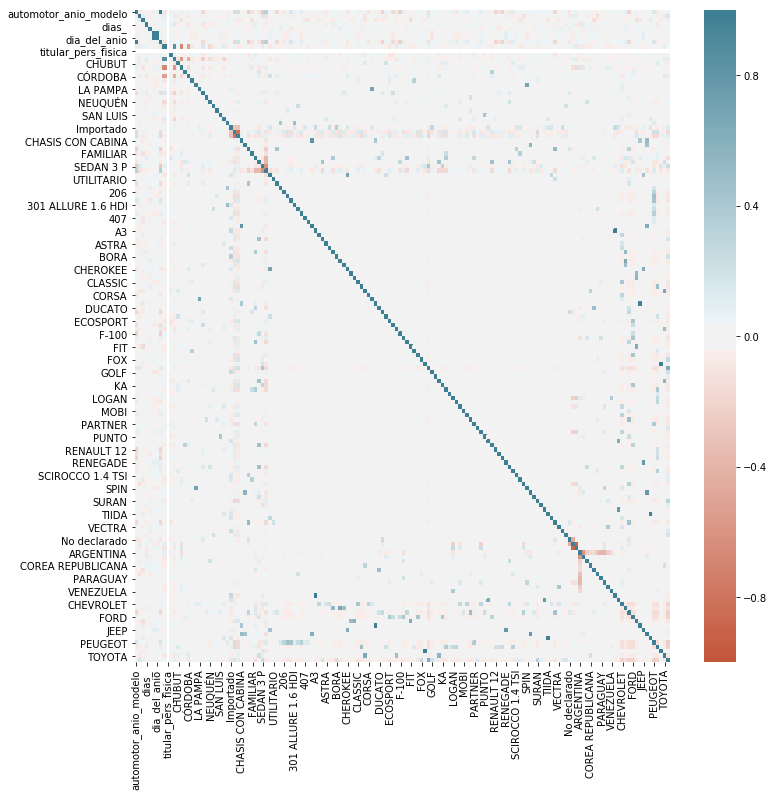

In [189]:
plt.figure(figsize= (12,12))
sns.heatmap(recup.corr(), vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

## Feature selection?

In [276]:
from sklearn import feature_selection

In [280]:
regresor_svr.best_params_

{'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}

In [288]:
estimator = SVR(kernel = 'linear')
selector = feature_selection.RFE(estimator, step=1)

In [289]:
selector.fit(Xtrain_scal, ytrain)

RFE(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                  gamma='auto_deprecated', kernel='linear', max_iter=-1,
                  shrinking=True, tol=0.001, verbose=False),
    n_features_to_select=None, step=1, verbose=0)

In [292]:
selector.ranking_, selector.n_features_

(array([ 1, 36,  7, 14, 25, 24,  1, 23,  1,  1,  1,  2,  1,  1, 11,  1,  1,
         1,  1,  8, 45, 63,  1, 18,  1,  1,  1,  1,  1, 22,  1,  9,  1,  1,
         1,  1,  1,  1, 35, 16,  1,  1,  1,  1,  5, 61, 57, 59,  1, 39, 38,
        41,  1,  1, 13, 42, 54, 58,  1,  1, 44,  1,  6,  1,  1,  1, 10,  1,
         1, 21,  1,  3, 50,  1, 46, 62, 48,  1, 26, 47, 15, 33, 49,  1,  1,
         1, 53,  1, 60, 52, 17,  1,  4,  1, 56, 51, 32, 43, 27, 31,  1, 40,
        28,  1,  1, 66, 65,  1,  1, 29, 30,  1,  1, 20, 64, 37,  1, 68,  1,
        34, 67,  1,  1,  1, 12, 55,  1,  1,  1,  1, 19,  1,  1]), 66)

In [293]:
y_rfe = selector.predict(Xtest_scal)

In [295]:
np.sqrt(mean_squared_error(ytest, y_rfe))

101.61975552534267

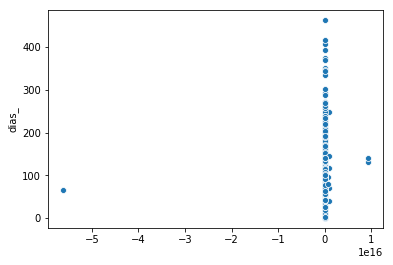

In [296]:
sns.scatterplot(ypred, ytest) # ESTO ES UNA PORNGA

----------------

# Importo librerias de regresión

In [103]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
#from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

## Hago cosita

### train test split y escalo

In [75]:
# Train test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [76]:
# Escalo con el Xtrain
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain_scal = scaler.transform(Xtrain)  
Xtest_scal = scaler.transform(Xtest)  

### LINEAR REGRESSION

In [77]:
#linear regression
lr = LinearRegression()

In [78]:
lr.fit(Xtrain_scal, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
ypred = lr.predict(Xtest_scal)

In [80]:
np.sqrt(mean_squared_error(ytest, ypred))

4576028879680211.0

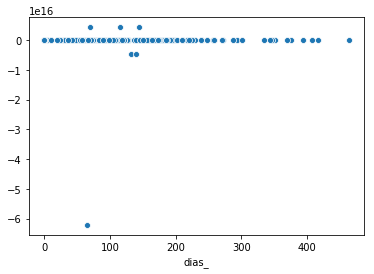

In [81]:
sns.scatterplot(ytest, ypred)

### KNN

In [82]:
# KNN
neigh = KNeighborsRegressor()

In [91]:
parameters_knn = [{'n_neighbors': np.arange(1,100,2), 'weights' : ['distance', 'uniform']}]

In [114]:
regresor_neigh = GridSearchCV(neigh, parameters_knn, refit = True, cv= 10, verbose=True, scoring= 'neg_mean_squared_error')

In [111]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [115]:
regresor_neigh.fit(Xtrain_scal, ytrain)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   16.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                          'weights': ['distance', 'uniform']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=True)

In [116]:
regresor_neigh.best_params_

{'n_neighbors': 89, 'weights': 'distance'}

In [118]:
ypred2 = regresor_neigh.predict(Xtest_scal)

In [119]:
np.sqrt(mean_squared_error(ytest, ypred2))

91.20131803816939

(0, 500)

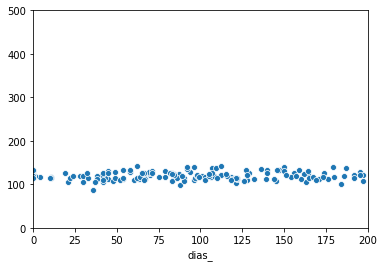

In [120]:
sns.scatterplot(ytest, ypred2)
plt.xlim(0,200)
plt.ylim(0, 500)

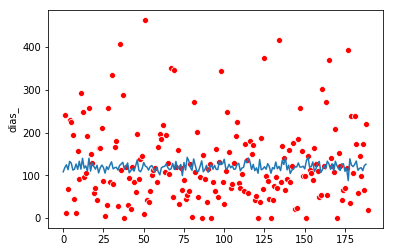

In [206]:
sns.scatterplot(range(1, ytest.shape[0]+ 1), ytest, color= 'r')
plt.plot(regresor_neigh.predict(Xtest_scal))


### SVR

In [125]:
# SVR
svreg = SVR()

In [133]:
parameters_svr = [{'kernel':['rbf', 'linear'] , 'C': [50, 100, 1000],'gamma': [0.1,0.0001, 1], 'epsilon': [0.01, 0.1, 1]}]

In [134]:
regresor_svr = GridSearchCV(svreg, parameters_svr, cv= 5, verbose=True)

In [135]:
regresor_svr.fit(Xtrain_scal, ytrain)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 10.9min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [50, 100, 1000], 'epsilon': [0.01, 0.1, 1],
                          'gamma': [0.1, 0.0001, 1],
                          'kernel': ['rbf', 'linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [136]:
regresor_svr.best_params_

{'C': 1000, 'epsilon': 1, 'gamma': 1, 'kernel': 'rbf'}

In [137]:
regresor_svr.best_score_

-0.007096423478026226

In [138]:
ypred3 = regresor_svr.predict(Xtest_scal)


In [139]:
np.sqrt(mean_squared_error(ytest, ypred3))

91.80489840113313

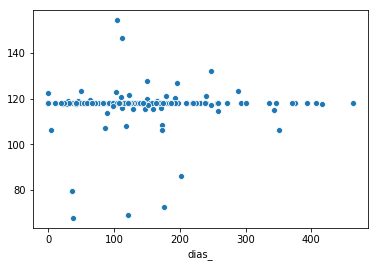

In [140]:
sns.scatterplot(ytest, ypred3)

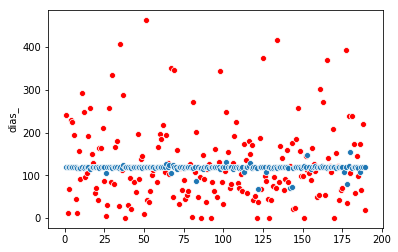

In [215]:
#sns.scatterplot(range(1, ytest.shape[0]+ 1), ytest, color= 'r')
#plt.plot(regresor_svr.predict(Xtest_scal))
sns.scatterplot(range(1, ytest.shape[0]+ 1), ytest, color= 'r')
sns.scatterplot(range(1, ytest.shape[0]+ 1), regresor_svr.predict(Xtest_scal))

In [207]:
### Decision Tree

In [208]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(Xtrain_scal, ytrain)

In [209]:
y_clf = clf.predict(Xtest_scal)

In [210]:
np.sqrt(mean_squared_error(ytest, y_clf))

123.62841148774875

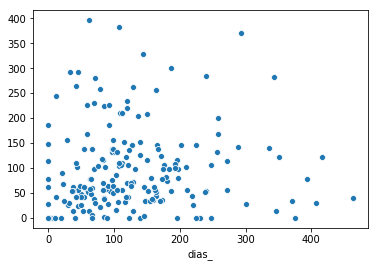

In [211]:
sns.scatterplot(ytest, y_clf)

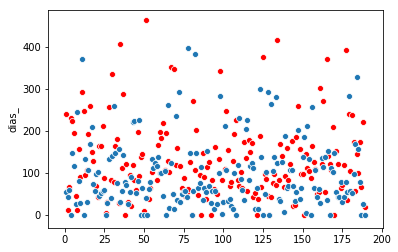

In [214]:
sns.scatterplot(range(1, ytest.shape[0]+ 1), ytest, color= 'r')
sns.scatterplot(range(1, ytest.shape[0]+ 1), clf.predict(Xtest_scal))

In [262]:
#depths = np.arange(1, 21)
#num_leafs = [1, 5, 10, 20, 50, 100]
#param_grid = [{'max_depth':depths,
#              'min_samples_leaf':num_leafs}]

parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}

In [216]:
gst = GridSearchCV(estimator=clf, param_grid={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}, cv=10) #scoring=rmse_scorer

In [217]:
gst.fit(Xtrain_scal, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 20, 2),
                         'min_samples_split': range(10, 500, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             

In [218]:
gst.best_params_

{'max_depth': 7, 'min_samples_split': 310}

In [219]:
y_gst = gst.predict(Xtest_scal)

In [220]:
np.sqrt(mean_squared_error(ytest, y_gst))

90.79537774930861

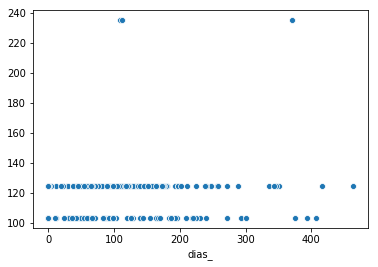

In [221]:
sns.scatterplot(ytest, y_gst) # TODO MAL

### Random Forest

In [224]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [225]:
rfr = rfr()

In [226]:
rfr.fit(Xtrain_scal, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [227]:
rfr_y = rfr.predict(Xtest_scal)

In [228]:
np.sqrt(mean_squared_error(ytest, rfr_y))

100.44347748516162

(0, 500)

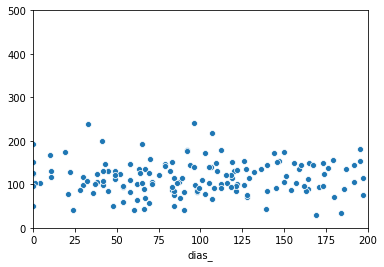

In [306]:
sns.scatterplot(ytest, rfr_y)
plt.xlim(0,200)
plt.ylim(0, 500)

## SIN FEATURE EXTRACTION

In [237]:
recup2 = pd.read_csv('./curados/para_reg.csv')

In [238]:
# genero una nueva columna donde el dato es solo la cantidad de dias como int
recup2['dias_'] = recup2['dias'].apply(daysonly)

In [239]:
recup2.drop(['tramite_tipo', 'registro_seccional_descripcion', 'titular_domicilio_localidad',
            'dias', 'fecha_recup'], axis= 1, inplace = True)

In [240]:
recup2.drop(['tramite_fecha', 'fecha_inscripcion_inicial', 'titular_domicilio_provincia'], axis = 1, inplace= True)

In [241]:
prov_dummie= pd.get_dummies(recup2.registro_seccional_provincia)
origen_dummie= pd.get_dummies(recup2.automotor_origen)
tipo_dummie= pd.get_dummies(recup2.automotor_tipo_descripcion)
modelo_dummie= pd.get_dummies(recup2.automotor_modelo_descripcion)
uso_dummie= pd.get_dummies(recup2.automotor_uso_descripcion)
mas_dummie= pd.get_dummies(recup2.titular_genero)

In [243]:
recup2 = recup2.join([prov_dummie, origen_dummie, tipo_dummie,  modelo_dummie, uso_dummie, mas_dummie]) #marca_dummie,

In [244]:
recup2.drop(['registro_seccional_provincia', 'automotor_origen', 'automotor_uso_descripcion','automotor_tipo_descripcion',
        'automotor_marca_descripcion', 'automotor_modelo_descripcion','titular_pais_nacimiento', 
       'titular_tipo_persona', 'titular_genero'], axis= 1, inplace = True)

In [245]:
recup2.shape

(756, 122)

In [247]:
y2 = recup2['dias_']
X2 = recup2.drop('dias_', axis= 1)

In [252]:
X2train, X2test, y2train, y2test = train_test_split(X2, y2, test_size=0.25, random_state=42)

In [253]:
# Escalo con el Xtrain
scaler = preprocessing.StandardScaler().fit(X2train)
X2train_scal = scaler.transform(X2train)  
X2test_scal = scaler.transform(X2test)  

In [273]:
# KNN
knn = KNeighborsRegressor()

In [255]:
parameters_knn = [{'n_neighbors': np.arange(1,100,2), 'weights' : ['distance', 'uniform']}]

In [256]:
regresor_neigh = GridSearchCV(knn, parameters_knn, refit = True, cv= 10, verbose=True, scoring= 'neg_mean_squared_error')

In [263]:
regresor_neigh.fit(X2train_scal, y2train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   14.5s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                          'weights': ['distance', 'uniform']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=True)

In [264]:
regresor_neigh.best_params_

{'n_neighbors': 85, 'weights': 'uniform'}

In [265]:
y2pred2 = regresor_neigh.predict(X2test_scal)

In [266]:
np.sqrt(mean_squared_error(y2test, y2pred2))

91.94716546412353

(0, 500)

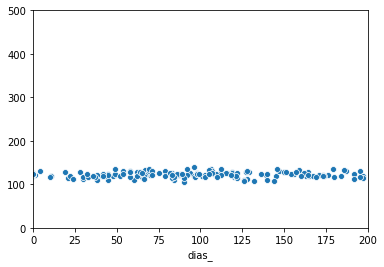

In [261]:
sns.scatterplot(y2test, y2pred2)
plt.xlim(0,200)
plt.ylim(0, 500)

In [262]:
iteraciones_knn = 100
# creo un vector de 50 posiciones para guardar los resultados de accuracy.
acc_knn = np.zeros(iteraciones_knn)

In [278]:
for r in range(0,iteraciones_knn):
    # entreno un KNN classifier con "k=r+1"
    neighb = KNeighborsRegressor(n_neighbors=r+1)
    neighb.fit(X2train_scal,y2train)
    # calculo la prediccion
    ypred_knn = neighb.predict(X2test_scal)
    # guardo el resultado de prediccion en la posicion r del vector "acc_knn"
    acc_knn[r] = np.sqrt(mean_squared_error(y2test, ypred_knn))

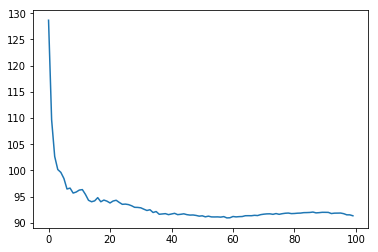

In [279]:
plt.plot(acc_knn)

In [301]:
neighopt = KNeighborsRegressor(n_neighbors=1, weights= 'distance')

In [302]:
neighopt.fit(X2train_scal, y2train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='distance')

In [303]:
ypred_opt = neighopt.predict(X2test_scal)

In [304]:
np.sqrt(mean_squared_error(y2test, ypred_opt))

128.67526083642787

(0, 500)

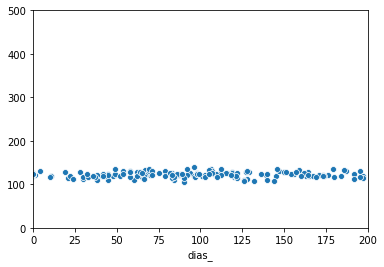

In [305]:
sns.scatterplot(y2test, y2pred2)
plt.xlim(0,200)
plt.ylim(0, 500)

In [307]:
rfr.fit(X2train_scal, y2train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [308]:
forest_fe_y = rfr.predict(X2test_scal)

In [310]:
np.sqrt(mean_squared_error(y2test, forest_fe_y))

102.76975678696974

(0, 500)

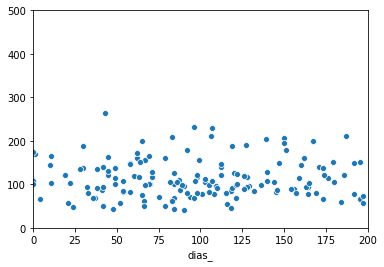

In [311]:
sns.scatterplot(y2test, forest_fe_y)
plt.xlim(0,200)
plt.ylim(0, 500)